<a href="https://colab.research.google.com/github/an439210/robot-vision/blob/main/3_image_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3
1. Upload a personal image in hosting place that can be accesed using an URL.
2. Perform filtering using a 3x3 and then a 5x5 box filter. Show the resulting images. What is the effect of applying a box filter. Explain the differences between the two resulting images.


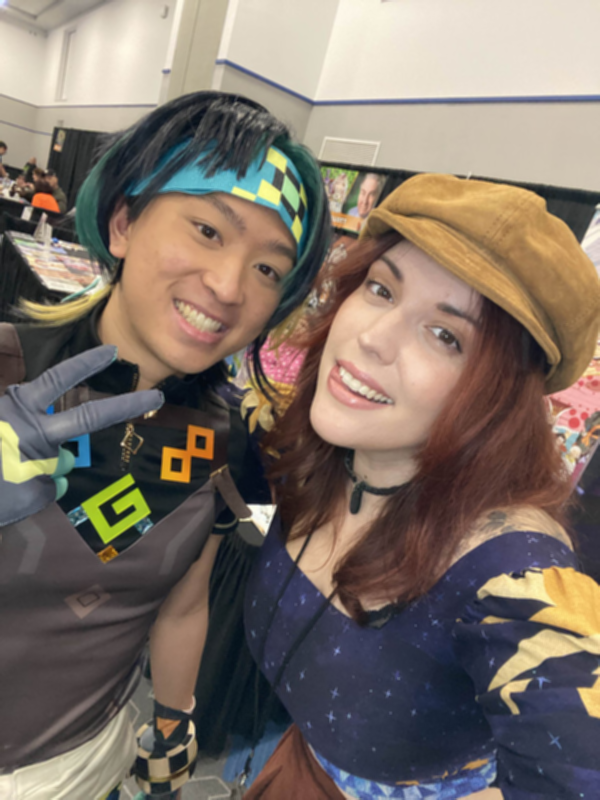

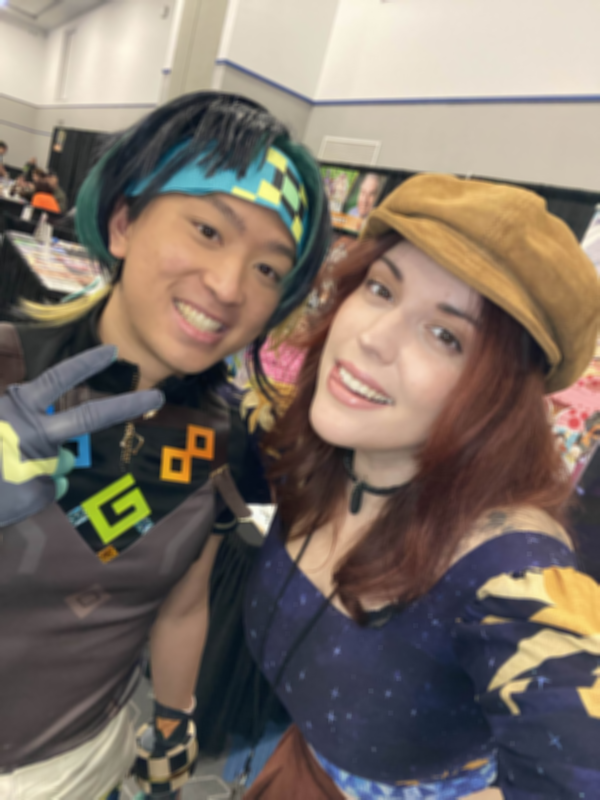

In [7]:
from google.colab.patches import cv2_imshow
from skimage import io
import cv2
import numpy as np

yourUrl = 'https://i.postimg.cc/3RQF11nS/IMG-2949.jpg'
image = io.imread(yourUrl)

# convert to BGR if you are using openCV
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#prepare the 3x3 shaped filter
k1 = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]])

#prepare the 5x5 shaped filter
k2 = np.array([[1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1]])

# Normalize the kernels if needed. 3x3 filter has 1/9 factor, 5x5 has a 1/25 factor
k1 = k1 / 9
k2 = k2 / 25

# apply filter
final_frame1 = cv2.filter2D(image, -1, k1)
final_frame2 = cv2.filter2D(image, -1, k2)

#make sure you are the right data type and values. You can use histogram to check it
# 0-255 if uint8
# 0-1 if float

# visualize
cv2_imshow(final_frame1)
cv2_imshow(final_frame2)


The box filter smooths the image, and a larger kernel will result in more blurring. You can see that in the image filtered with the 3x3 kernel, there is less blurring, while in the image filtered with the 5x5 kernel, there is more blurring.

3. Obtain and print two-dimensional Gaussian kernels with the following characteristics:<br>
a) $\sigma^2 = 1$, kernel size: 3x3, <br>b) $\sigma^2 = 1.2$, kernel size: 5x5, <br> c) $\sigma^2 = 1.6$, kernel size: 9x9.





3x3 Kernel:
 [[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]

5x5 Kernel:
 [[0.00733235 0.02077942 0.02940561 0.02077942 0.00733235]
 [0.02077942 0.05888756 0.08333362 0.05888756 0.02077942]
 [0.02940561 0.08333362 0.11792801 0.08333362 0.02940561]
 [0.02077942 0.05888756 0.08333362 0.05888756 0.02077942]
 [0.00733235 0.02077942 0.02940561 0.02077942 0.00733235]]

9x9 Kernel:
 [[0.00012104 0.00047501 0.00126131 0.00226616 0.00275495 0.00226616
  0.00126131 0.00047501 0.00012104]
 [0.00047501 0.00186409 0.00494975 0.00889309 0.01081125 0.00889309
  0.00494975 0.00186409 0.00047501]
 [0.00126131 0.00494975 0.01314314 0.02361394 0.02870725 0.02361394
  0.01314314 0.00494975 0.00126131]
 [0.00226616 0.00889309 0.02361394 0.04242656 0.05157759 0.04242656
  0.02361394 0.00889309 0.00226616]
 [0.00275495 0.01081125 0.02870725 0.05157759 0.0627024  0.05157759
  0.02870725 0.01081125 0.00275495]
 [0.00226616 0.00889309 0.02361394 0.04

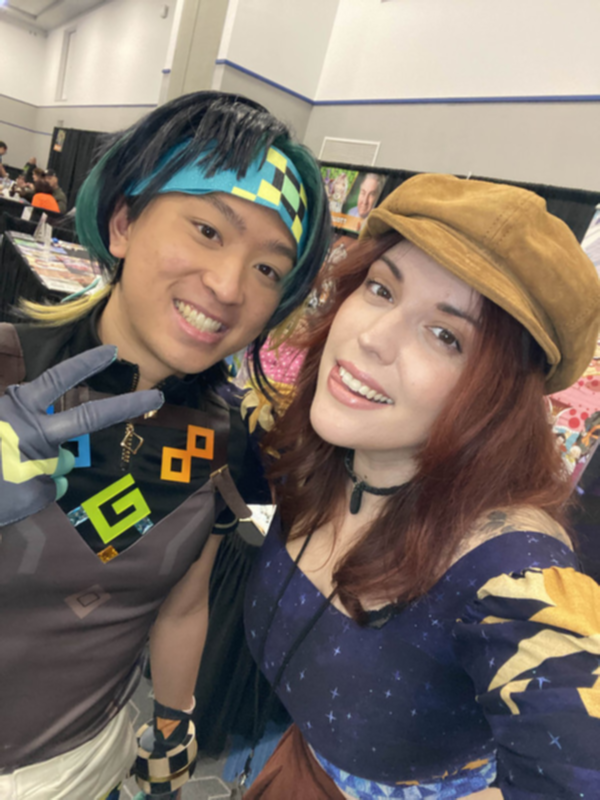

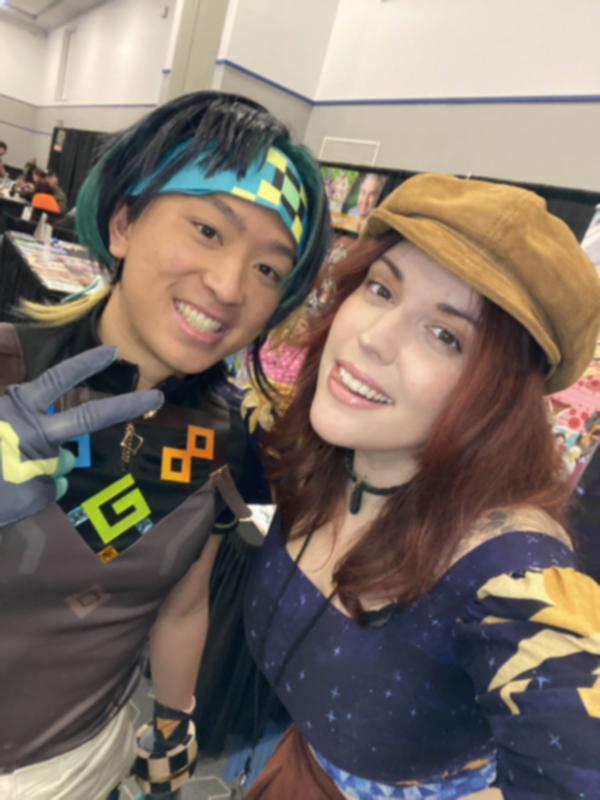

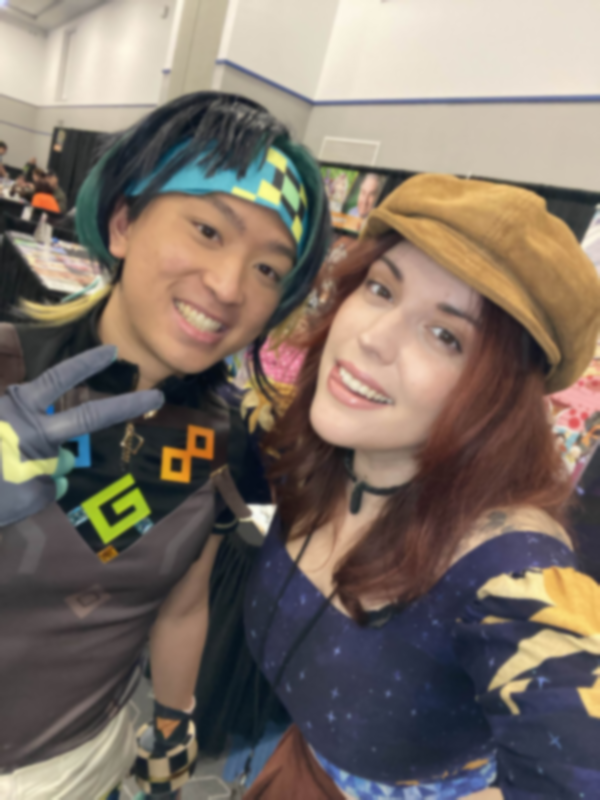

In [8]:
#add your code here

# A possible implementation is here. Modify it play with it:
#
import numpy as np

def gkern(l=5, sig=1.):
#    """\
#    creates gaussian kernel with side length l and a sigma of sig
#    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)   #note that this normalize the filter to 1. is it desirable?.

gk3 = gkern(3, 1)
gk5 = gkern(5, 1.2)
gk9 = gkern(9, 1.6)

print("3x3 Kernel:\n", gk3)
print("\n5x5 Kernel:\n", gk5)
print("\n9x9 Kernel:\n", gk9)

final_gauss3 = cv2.filter2D(image, -1, gk3)
final_gauss5 = cv2.filter2D(image, -1, gk5)
final_gauss9 = cv2.filter2D(image, -1, gk9)

cv2_imshow(final_gauss3)
cv2_imshow(final_gauss5)
cv2_imshow(final_gauss9)

4. Apply the three
Gaussian kernels obtained previously on your uploaded image. show your filter results. Discuss the differences of
Gaussian operations with different sigmas. Also, compare your results with question 2: what are the differences between these ﬁlters, what do you observe ? Which ﬁltering is the most eﬀective in which images ? Why ?

Larger sigmas and larger kernels result in more blurring, as seen by the images above. Because Gaussian kernels are more center-heavy, with pixels in the center of the kernel having a higher weight as opposed to the box filter where all pixels have equal weight, Gaussian filters can produce a more natural blur. As such, Gaussian filtering is more effective for this image.




5. Implement the three steps of Sobel filtering. Apply it to the uploaded image for 3 different thresholds. Show the results on
the screen, and discuss the resulting images.



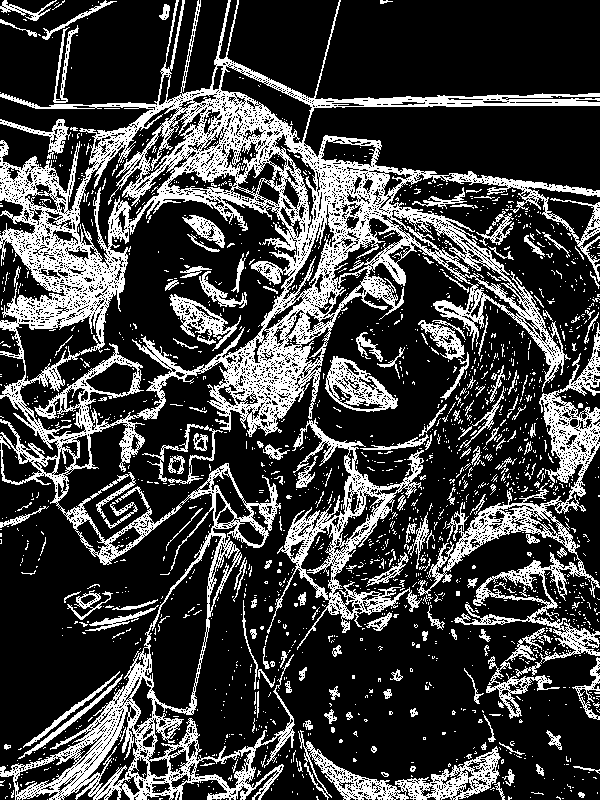

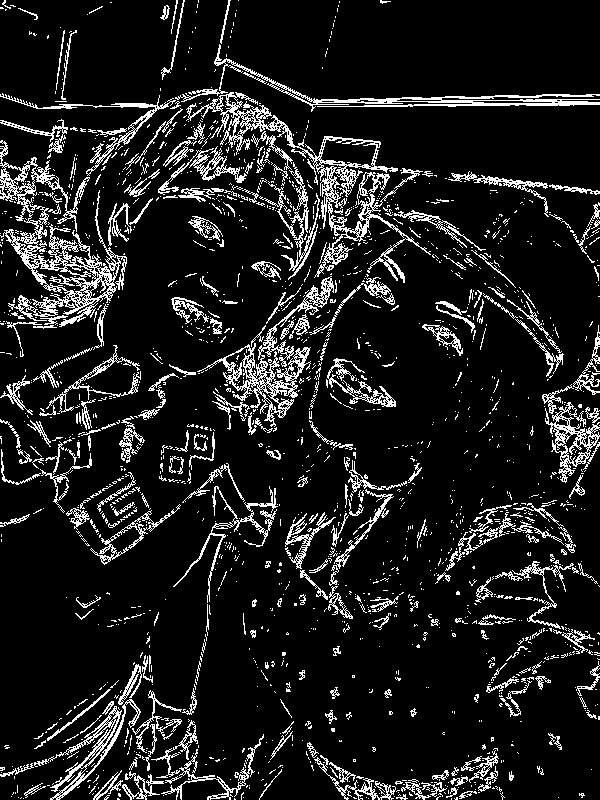

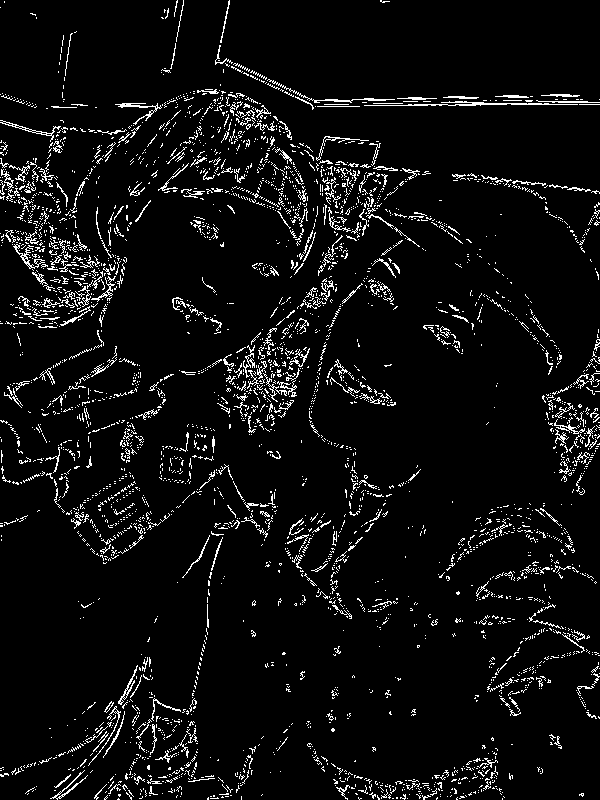

In [15]:
# step 1. Get x and y gradients . Use the correct kernels
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

kernel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

sobel_x = cv2.filter2D(gray, cv2.CV_64F, kernel_x)
sobel_y = cv2.filter2D(gray, cv2.CV_64F, kernel_y)

# step 2. Compute the magnitude of the gradient
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
magnitude = magnitude.astype(np.uint8)

# Step 3. Threshold. Choose 3 different threshold. visualize outputs
sobel1 = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)[1]
sobel2 = cv2.threshold(magnitude, 100, 255, cv2.THRESH_BINARY)[1]
sobel3 = cv2.threshold(magnitude, 150, 255, cv2.THRESH_BINARY)[1]

cv2_imshow(sobel1)
cv2_imshow(sobel2)
cv2_imshow(sobel3)

When the threshold of the Sobel filter is lower (e.g. 50), more of the weaker edges are picked up, but consequently a lot of noise is added, like in the background. You can compare this to when the threshold is higher (e.g. 150); some seemingly obvious edges, like the edge of Amber Lee Connors's shirt, are ignored. For an image like this I think a medium threshold (e.g. 100) balances the two reasonably well.


6. Use canny edge detector incorporated in opencv. Pick two diferent sets of hysteresys thresholds. What can you tell about the effect on the obtained edges.  


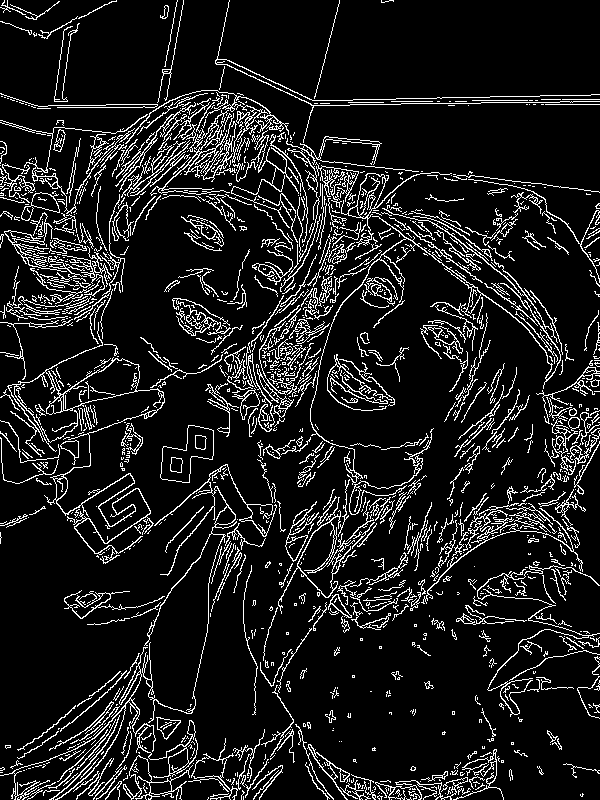

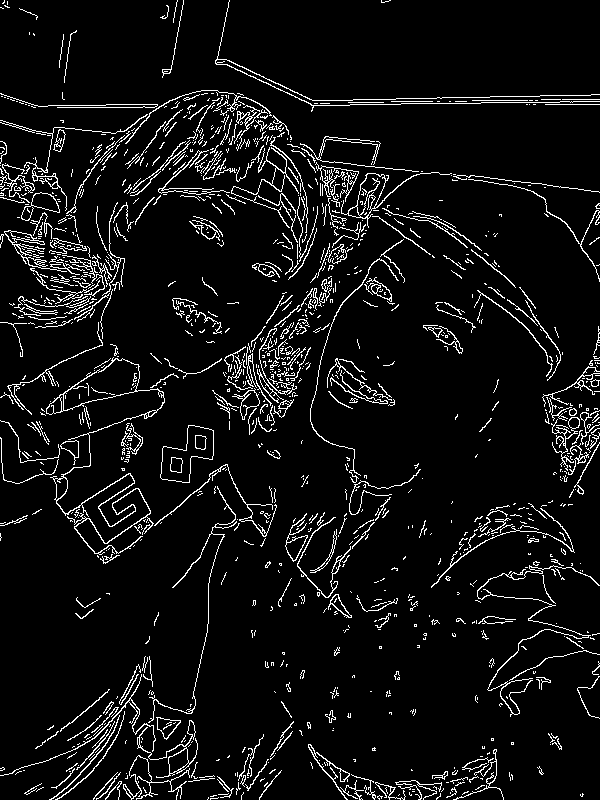

In [ ]:
# use the canny from openCV
# cv.Canny(	image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]	)

final_edges1 = cv2.Canny(image, 50, 150)
final_edges2 = cv2.Canny(image, 150, 200)

cv2_imshow(final_edges1)
cv2_imshow(final_edges2)


The lower threshold picks up a lot more of the finer edges, like the wrinkles in my shirt or the edge between Amber Lee Connors's chin and neck; meanwhile, the higher threshold ignores some of thoses details to create a cleaner look.

Now, you are going to use morphological operations to try to count automatically the number of rice grains from an image.

7. Read image, convert it to gray scale and apply a bilateral filter.
<br>A bilateral filter is a filter that smooth where there is not changes on the gray scale preserving values close to edges. To understand bilateral filters  [Click here](https://machinelearningknowledge.ai/bilateral-filtering-in-python-opencv-with-cv2-bilateralfilter/)


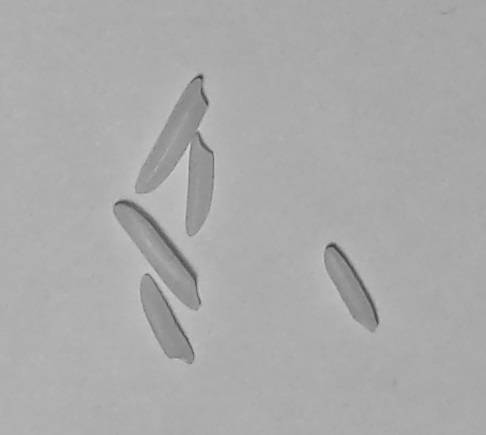

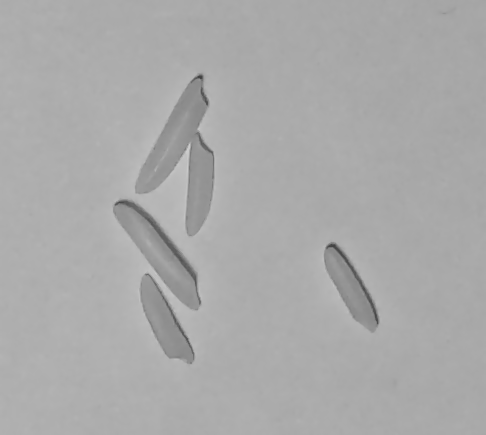

In [22]:
from skimage import io
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# had to host image on my own because imgur was not working
image = io.imread('https://i.postimg.cc/W3sJtH9v/pgWt1.jpg')   #io.imread reads in the format RGB. if we were using opencv native read, the read with  be already BGR and the following conversion wouldn't be neccesary
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# utilize cvtColor to convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display the gray scale image
cv2_imshow(gray)

# apply a bilateral filter. Adjust the value to your convenience
diameter_neighborhood= 5
sigma_color_space = 7
sigma_spatial_space = 3
gray = cv2.bilateralFilter(gray, diameter_neighborhood, sigma_color_space, sigma_spatial_space)
cv2_imshow(gray)




8. Compute the edges of the previous image with a Canny filter. Adjust the thresholds of the canny filter to obtain the best edge you can.

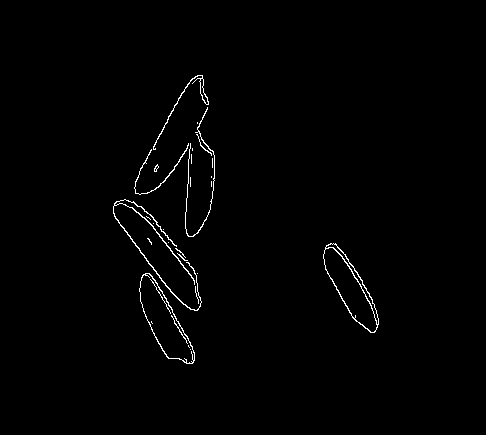

In [23]:
# use the canny from openCV
threshold1 = 40
threshold2 = 80
edges = cv2.Canny(	gray, threshold1, threshold2)
cv2_imshow(edges)


9. Apply a closing operation to the edges of the image. Experiment with different kernel sizes (3,5,9).


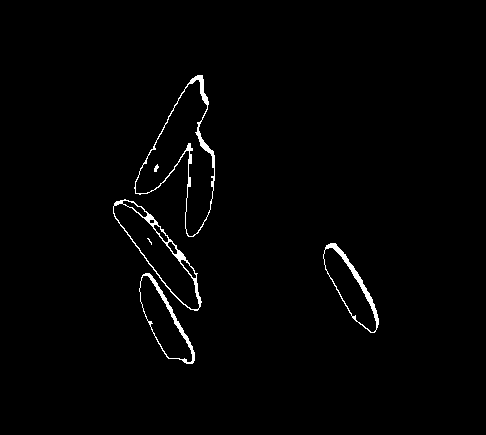

In [24]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

10. Find the countours (curve joining all the continuous points (along the boundary)) of the object, display the grains you found in the image. Explanation of contours is [here](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html).
<br>a) what the values of the variable (array) cnts represents?  <br>b) What the variable "peri" represents?  <br>c) Change the color of the contour to red

A total of 4 grains were found
1


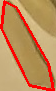

2


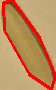

3


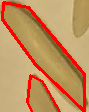

4


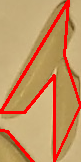

the grains


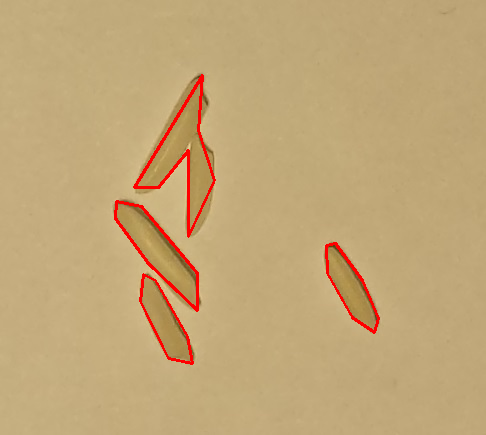

In [25]:
i=0
cnts,heir= cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]


print("A total of " + str(len(cnts)) + " grains were found")
for c in cnts:
	peri = cv2.arcLength(c, True)

  #an approximation of the contour of the figure
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)

	# Understand what are the parameters of this function
	cv2.drawContours(img, [approx], -1, (0, 0, 255), 2)

  # crop the image
	x,y,w,h =cv2.boundingRect(c)
	i=i+1;
	print(i)
	newImage=img[y:y+h,x:x+w]
	cv2_imshow(newImage)

print("the grains")
cv2_imshow(img)


The array cnts stores all of the contours found by findContours. peri is the perimeter of a given contour.